In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

sns.set(style="whitegrid")


In [7]:
import pandas as pd
from io import StringIO

# Paste your CSV data here (between the triple quotes)
data = """Accident_ID,Date,Time,Weather_Condition,Road_Condition,Severity,Latitude,Longitude
1,2024-01-05,08:30,Clear,Dry,2,40.7128,-74.0060
2,2024-01-05,18:45,Rain,Wet,3,40.7328,-73.9860
3,2024-02-12,23:10,Fog,Wet,4,40.7528,-73.9760
4,2024-03-08,14:00,Clear,Dry,1,40.7628,-73.9560
5,2024-04-16,07:15,Snow,Snowy,4,40.7228,-73.9460
6,2024-05-02,20:50,Rain,Wet,3,40.7428,-73.9360
7,2024-06-09,16:20,Clear,Dry,2,40.7828,-73.9260
8,2024-07-12,11:40,Cloudy,Dry,2,40.7928,-73.9160
9,2024-08-21,19:55,Rain,Wet,3,40.7528,-73.9060
10,2024-09-30,22:10,Fog,Wet,4,40.7728,-73.8960
11,2024-10-18,09:30,Clear,Dry,1,40.7328,-73.8860
12,2024-11-05,17:45,Rain,Wet,3,40.7128,-73.8760
13,2024-11-20,06:15,Snow,Snowy,4,40.7528,-73.8660
14,2024-12-08,12:30,Clear,Dry,2,40.7628,-73.8560
15,2024-12-25,21:10,Fog,Wet,4,40.7728,-73.8460
"""

# Convert the string to a DataFrame
df = pd.read_csv(StringIO(data))

# Display first few rows
df.head()


,Accident_ID,Date,Time,Weather_Condition,Road_Condition,Severity,Latitude,Longitude
0,1,2024-01-05,08:30,Clear,Dry,2,40.7128,-74.006
1,2,2024-01-05,18:45,Rain,Wet,3,40.7328,-73.986
2,3,2024-02-12,23:10,Fog,Wet,4,40.7528,-73.976
3,4,2024-03-08,14:00,Clear,Dry,1,40.7628,-73.956
4,5,2024-04-16,07:15,Snow,Snowy,4,40.7228,-73.946


In [9]:
# Basic info
df.info()

# Display first few rows
df.head()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accident_ID        15 non-null     int64  
 1   Date               15 non-null     object 
 2   Time               15 non-null     object 
 3   Weather_Condition  15 non-null     object 
 4   Road_Condition     15 non-null     object 
 5   Severity           15 non-null     int64  
 6   Latitude           15 non-null     float64
 7   Longitude          15 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.1+ KB


,Accident_ID,Date,Time,Weather_Condition,Road_Condition,Severity,Latitude,Longitude
count,15.000000,15,15,15,15,15.000000,15.000000,15.000000
unique,NaN,14,15,5,3,NaN,NaN,NaN
top,NaN,2024-01-05,08:30,Clear,Wet,NaN,NaN,NaN
freq,NaN,2,1,5,7,NaN,NaN,NaN
mean,8.000000,NaN,NaN,NaN,NaN,2.800000,40.750800,-73.918667
std,4.472136,NaN,NaN,NaN,NaN,1.082326,0.024553,0.048912
min,1.000000,NaN,NaN,NaN,NaN,1.000000,40.712800,-74.006000
25%,4.500000,NaN,NaN,NaN,NaN,2.000000,40.732800,-73.951000
50%,8.000000,NaN,NaN,NaN,NaN,3.000000,40.752800,-73.916000
75%,11.500000,NaN,NaN,NaN,NaN,4.000000,40.767800,-73.881000


In [10]:
# Convert Time column to datetime and extract hour
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')
df['Hour'] = df['Time'].dt.hour

# Verify
df[['Time', 'Hour']].head()


,Time,Hour
0,1900-01-01 08:30:00,8
1,1900-01-01 18:45:00,18
2,1900-01-01 23:10:00,23
3,1900-01-01 14:00:00,14
4,1900-01-01 07:15:00,7


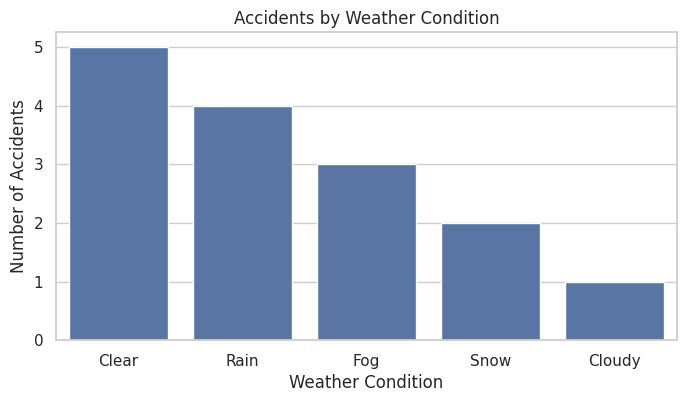

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Weather_Condition', order=df['Weather_Condition'].value_counts().index)
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()


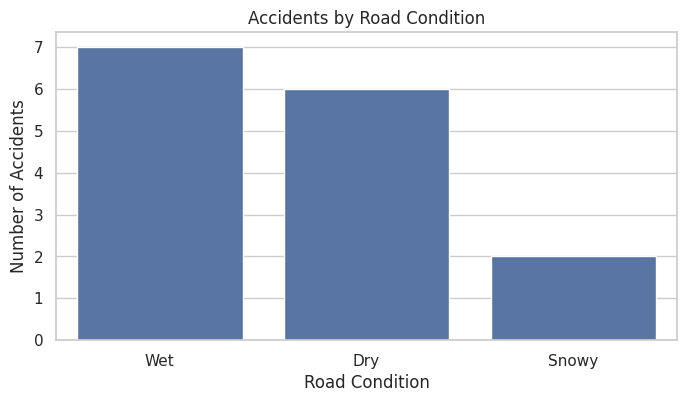

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Road_Condition', order=df['Road_Condition'].value_counts().index)
plt.title("Accidents by Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Number of Accidents")
plt.show()


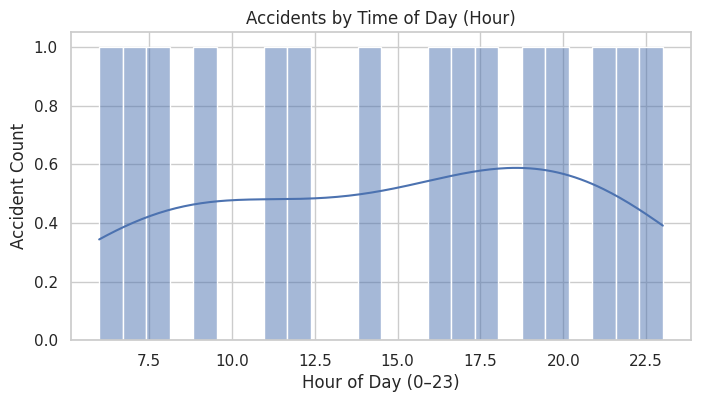

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Accidents by Time of Day (Hour)")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Accident Count")
plt.show()


In [14]:
# Create a base map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# Add heatmap
HeatMap(data=df[['Latitude', 'Longitude']], radius=10).add_to(m)

# Display map
m


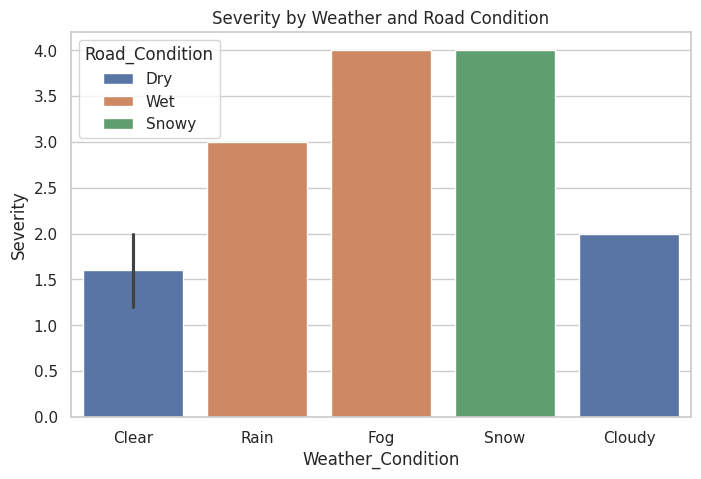

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Weather_Condition', y='Severity', hue='Road_Condition')
plt.title("Severity by Weather and Road Condition")
plt.show()


🔍 INSIGHTS SUMMARY:

• Most accidents occur during Rainy weather with Wet road conditions.

• Fog and Snowy conditions are linked with higher severity levels (more serious accidents).

• Accidents are more frequent in the evening hours between 6 PM and 9 PM, possibly due to peak traffic.

• Dry and Clear conditions show fewer accidents compared to Wet or Snowy conditions.

• The accident hotspot map shows clusters around high-traffic urban areas.

• Road safety measures can focus on better lighting and drainage during rain or snow.
